In [1]:
from model_loader import preload_model_from_standard_weights
import pipeline
from transformers import CLIPTokenizer
from PIL import Image
import torch

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
DEVICE  = "cpu"
ALLOW_CUDA =False

if  torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE ="cuda"

print(f"{DEVICE} is using")

cpu is using


In [3]:
## MODEL LOAD
tokenizer = CLIPTokenizer("../data/vocab.json",merges_file="../data/merges.txt")
pre_trained_model_path = "../data/v1-5-pruned-emaonly.ckpt"
models = preload_model_from_standard_weights(pre_trained_model_path,device = DEVICE)

100%|██████████| 50/50 [21:14<00:00, 25.50s/it]


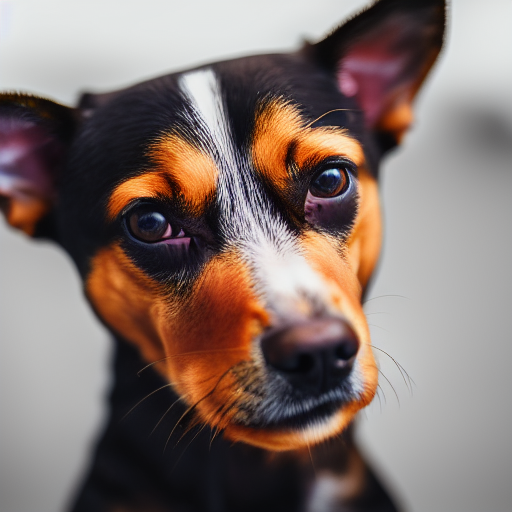

In [11]:

## TEXT TO IMAGE

prompt = "A cute dog, ultra sharp, cinematic, 100mm lens, 8k resolution."
uncond_prompt = "" # Negative Prompt
do_cfg = True
promt_cond_att = 8

## IMAGE TO IMAGE 

input_image = None
image_path = "../images/cat.jpg"
#input_image = Image.open(image_path)
in_img_att = 0.8
sampler = "ddpm" 
n_infer_steps = 50
seed = 42

output_image = pipeline.generate_image(
    prompt=prompt,uncond_prompt=uncond_prompt,input_image=input_image,in_img_att=in_img_att,
    do_cfg=do_cfg,promt_cond_att=promt_cond_att,sampler_name=sampler,n_infer_steps= n_infer_steps,
    models=models,seed = seed,device = DEVICE,idle_device="cpu",tokenizer=tokenizer,
)

Image.fromarray(output_image)





